In [139]:
##### Importing libraries #####
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline


In [140]:
##### Importing the test and train data #####
dFtrain = pd.read_csv("train.csv", low_memory=False)
dFtest = pd.read_csv("test.csv", low_memory=False)

##### Data Stats #####
print("Training set shape: %s"%str(dFtrain.shape))
print("Test set shape: %s"%str(dFtest.shape))

##### Setting the target feature, and removing the ID column #####
TimeTargets = dFtrain['y']
dFtrain = dFtrain.drop("y", axis = 1)
dFtrain = dFtrain.drop("ID", axis = 1)
Test_IDs = dFtest['ID']
dFtest = dFtest.drop("ID", axis = 1)

Training set shape: (4209, 378)
Test set shape: (4209, 377)


# Data Exploration

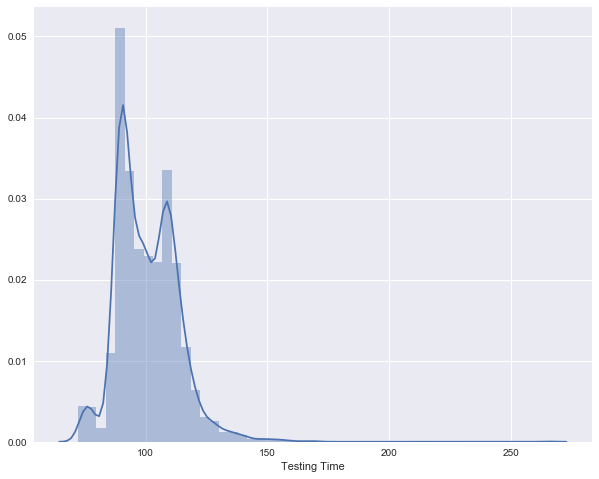

In [141]:
##### Plot distribution of Testing Times (target variable) #####
TimeTargets.name = "Testing Time"
sns.set(rc={"figure.figsize": (10, 8)})
sns.distplot(TimeTargets)

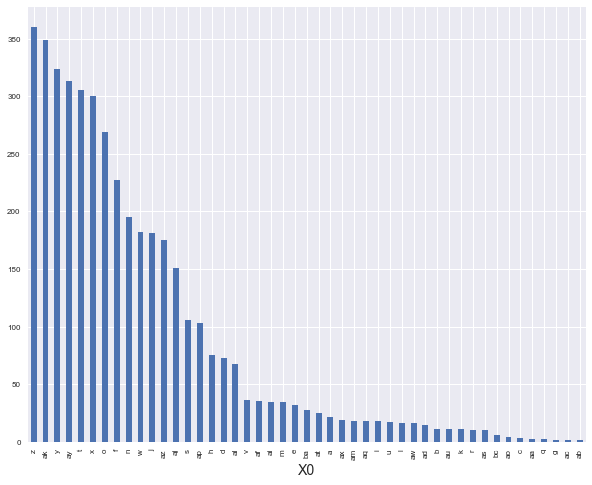

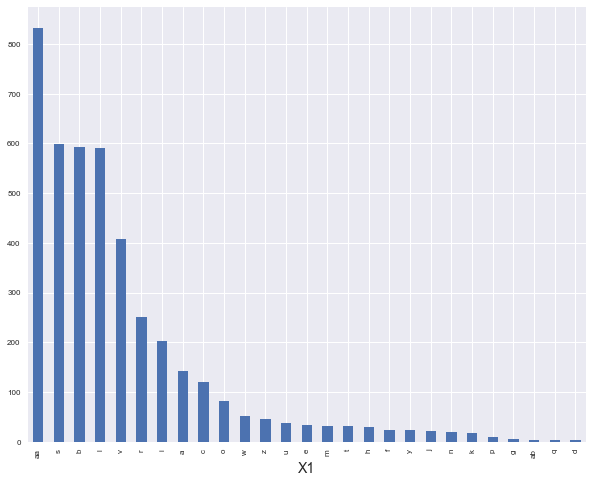

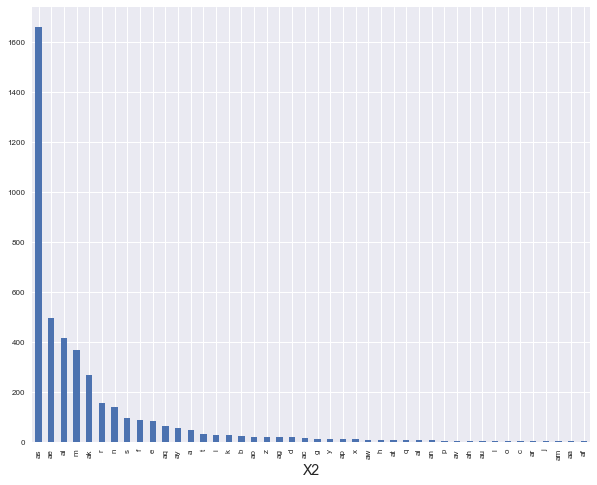

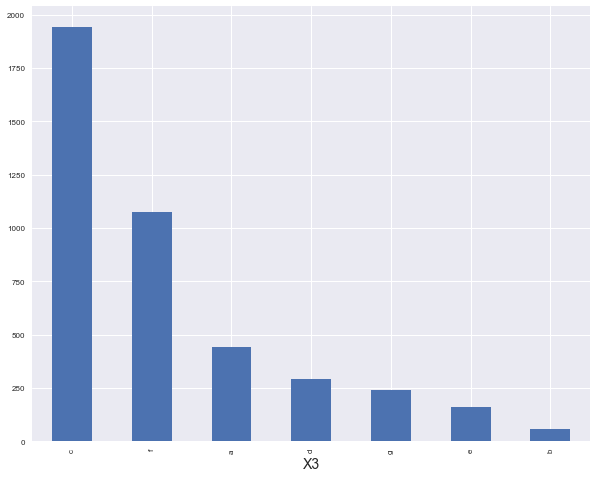

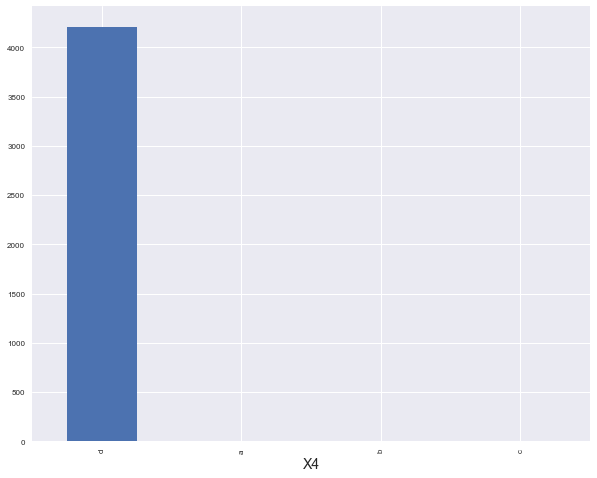

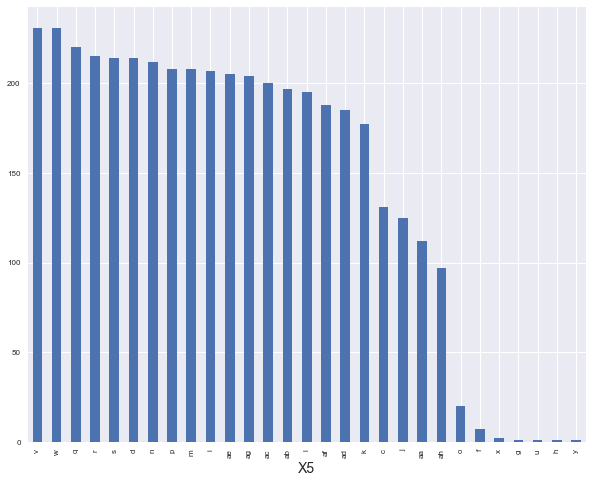

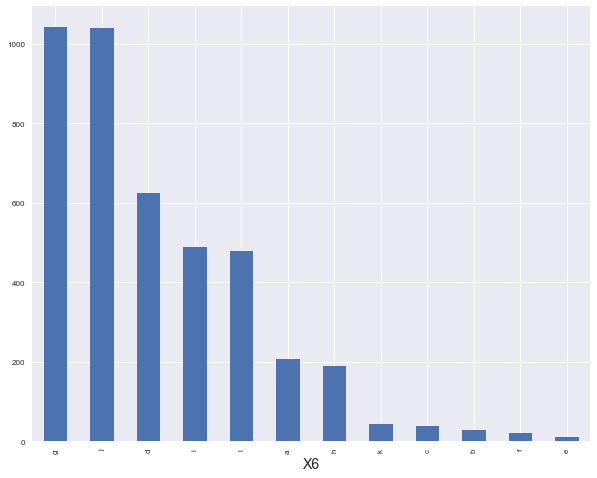

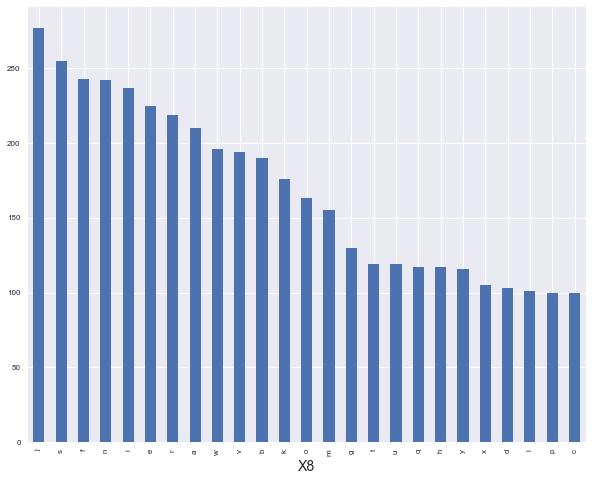

In [142]:
##### Plotting frequency distribution of categorical features #####
for i,feature in enumerate(dFtrain.columns):
    if np.dtype(dFtrain[feature]) == object:
        fig = plt.figure(i)
        dFtrain[feature].value_counts().plot(kind='bar')
        plt.xlabel(feature, fontsize=14)
        plt.tick_params(axis='both', which='major', labelsize=8)

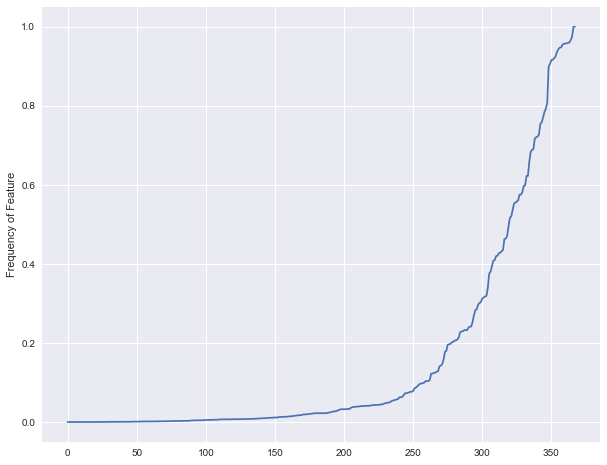

In [143]:
# Exploring Training Set

##### Plotting frequency distribution of non-categorical features #####
dfFeatureFreq = pd.DataFrame()
featurefreq = np.array([])
arrayLen = float(dFtrain.shape[0])
for feature in dFtrain.columns:
    if np.dtype(dFtrain[feature]) != object:
        dfFeatureFreq[feature] = [np.sum(dFtrain.loc[:,feature])/arrayLen]
        featurefreq = np.append(featurefreq,np.sum(dFtrain.loc[:,feature])/arrayLen)
#dfFeatureFreq.plot(kind='scatter',figsize=(15,15))
plt.plot(np.sort(featurefreq))
plt.ylabel('Frequency of Feature')

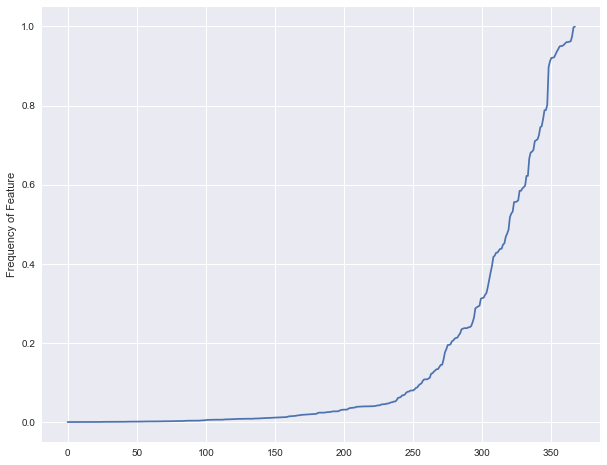

In [144]:
# Exploring Test Set

##### Plotting frequency distribution of non-categorical features #####
dfFeatureFreq_test = pd.DataFrame()
featurefreq_test = np.array([])
arrayLen = float(dFtest.shape[0])
for feature in dFtest.columns:
    if np.dtype(dFtest[feature]) != object:
        dfFeatureFreq_test[feature] = [np.sum(dFtest.loc[:,feature])/arrayLen]
        featurefreq_test = np.append(featurefreq_test,np.sum(dFtest.loc[:,feature])/arrayLen)
#dfFeatureFreq.plot(kind='scatter',figsize=(15,15))
plt.plot(np.sort(featurefreq_test))
plt.ylabel('Frequency of Feature')

In [145]:
print(np.max(featurefreq))
print(np.min(featurefreq))

0.999762413875
0.0


# Dataset Augmentation

In [146]:
##### Dropping features with 0-variation in data #####
'''
for column in dFtrain:
    if np.dtype(dFtrain[column]) != object:
        if (dfFeatureFreq[column][0] == 0.0):
            dFtrain.drop(column,axis=1,inplace=True)
            dFtest.drop(column,axis=1,inplace=True)
            '''

'\nfor column in dFtrain:\n    if np.dtype(dFtrain[column]) != object:\n        if (dfFeatureFreq[column][0] == 0.0):\n            dFtrain.drop(column,axis=1,inplace=True)\n            dFtest.drop(column,axis=1,inplace=True)\n            '

In [147]:
##### Show number of dropped features #####
print ("Number of dropped features: %d"%(376-dFtrain.shape[1]))

Number of dropped features: 0


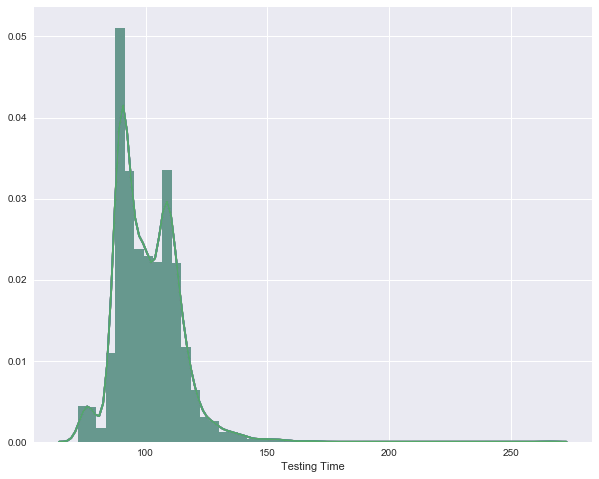

In [148]:
##### Identifying the categorical features for label encoding #####
cat_features = []
for features in dFtrain.columns:
    if np.dtype(dFtrain[features]) == object:
        cat_features.append(features)
        sns.distplot(TimeTargets)

##### Label encoding the categorical features #####
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for  categoricalFeature in cat_features:
    temp_array = le.fit_transform(dFtrain[categoricalFeature])
    dFtrain[categoricalFeature] = temp_array
for  categoricalFeature in cat_features:
    temp_array = le.fit_transform(dFtest[categoricalFeature])
    dFtest[categoricalFeature] = temp_array

In [149]:
##### Data Scaling #####
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dFtrain)
scaler.transform(dFtrain)
scaler.transform(dFtest)

array([[ 0.45652174,  0.88461538,  0.79069767, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91304348,  0.11538462,  0.18604651, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45652174,  0.88461538,  0.39534884, ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 1.02173913,  0.88461538,  0.39534884, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.15217391,  0.88461538,  0.39534884, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.91304348,  0.03846154,  0.18604651, ...,  0.        ,
         0.        ,  0.        ]])

In [150]:

'''##### Increasing the dataset size ######
for i in range(1,3):
    dFtrain = pd.concat([dFtrain,dFtrain], ignore_index=True)
    TimeTargets = pd.concat([TimeTargets,TimeTargets], ignore_index=True)
'''

'##### Increasing the dataset size ######\nfor i in range(1,3):\n    dFtrain = pd.concat([dFtrain,dFtrain], ignore_index=True)\n    TimeTargets = pd.concat([TimeTargets,TimeTargets], ignore_index=True)\n'

In [151]:
##### Applying PCA and ICA to reduce the number of utilized features #####

# Target number of dimensions for PCA & ICA
n_dimensions = 12

dataset_columns = dFtrain.columns

##### PCA #####
from sklearn.decomposition import PCA
pca = PCA(n_components=n_dimensions, random_state=42) #22 best so far
pca.fit(dFtrain)
pca_train = pca.transform(dFtrain)
pca_test = pca.transform(dFtest)

##### ICA #####
from sklearn.decomposition import FastICA
ica = FastICA(n_components=n_dimensions, max_iter=10000, random_state=42)
ica.fit(dFtrain)
ica_train = ica.transform(dFtrain)
ica_test = ica.transform(dFtest)

##### Compile transformed training and testing datasets #####
for i in range(1, n_dimensions+1):
    dFtrain['pca_col_' + str(i)] = pca_train[:,i-1]
    dFtest['pca_col_' + str(i)] = pca_test[:,i-1]
    dFtrain['ica_col_' + str(i)] = ica_train[:,i-1]
    dFtest['ica_col_' + str(i)] = ica_test[:,i-1]

[0]	train-rmse:100.982	test-rmse:100.981
[50]	train-rmse:78.8258	test-rmse:78.8292
[100]	train-rmse:61.624	test-rmse:61.6275
[150]	train-rmse:48.2921	test-rmse:48.2951
[200]	train-rmse:37.9911	test-rmse:37.9941
[250]	train-rmse:30.0669	test-rmse:30.0689
[300]	train-rmse:24.0085	test-rmse:24.0117
[350]	train-rmse:19.4354	test-rmse:19.4395
[400]	train-rmse:16.038	test-rmse:16.0431
[450]	train-rmse:13.5623	test-rmse:13.568
[500]	train-rmse:11.8018	test-rmse:11.8131
[550]	train-rmse:10.584	test-rmse:10.6018
[600]	train-rmse:9.76222	test-rmse:9.78968
[650]	train-rmse:9.21816	test-rmse:9.26028
[700]	train-rmse:8.86153	test-rmse:8.91995
[750]	train-rmse:8.62723	test-rmse:8.70667
[800]	train-rmse:8.46986	test-rmse:8.573
[850]	train-rmse:8.36647	test-rmse:8.48923
[900]	train-rmse:8.29302	test-rmse:8.43657
[950]	train-rmse:8.23732	test-rmse:8.40376
[1000]	train-rmse:8.18971	test-rmse:8.3824
[1050]	train-rmse:8.15267	test-rmse:8.36929
[1100]	train-rmse:8.12202	test-rmse:8.36015
[1150]	train-rmse:

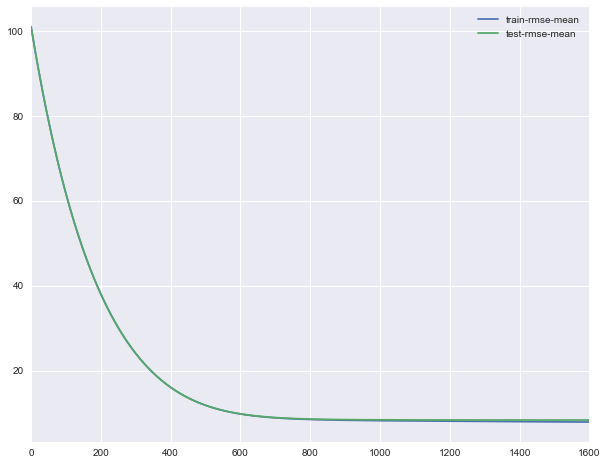

In [152]:
from sklearn import model_selection	
X_train, X_test, y_train, y_test = model_selection.train_test_split(dFtrain,TimeTargets,test_size=0.15,random_state=7)

### XGBoost Trial ###
from xgboost import XGBRegressor
import xgboost as xgb

#y_mean = np.mean(y_train)
xgb_params = {
     'n_trees': 1500, 
     'eta': 0.005,
     'max_depth': 2,
     'subsample': 0.95,
     'objective': 'reg:linear',
     'eval_metric': 'rmse',
     'base_score': 0., # base prediction = mean(target)
     'silent': 0}

xgbTrain = xgb.DMatrix(X_train,y_train)
xgbTest = xgb.DMatrix(X_test)
xgbKaggleTest = xgb.DMatrix(dFtest)

cv_result = xgb.cv(xgb_params, xgbTrain, num_boost_round=1600, early_stopping_rounds=500, nfold=5, verbose_eval=50, show_stdv=False)
cv_result[['train-rmse-mean','test-rmse-mean']].plot()

#num_boost_rounds = len(cv_result)
num_boost_rounds = 1600
model = xgb.train(dict(xgb_params, silent=0), xgbTrain, num_boost_round=num_boost_rounds)

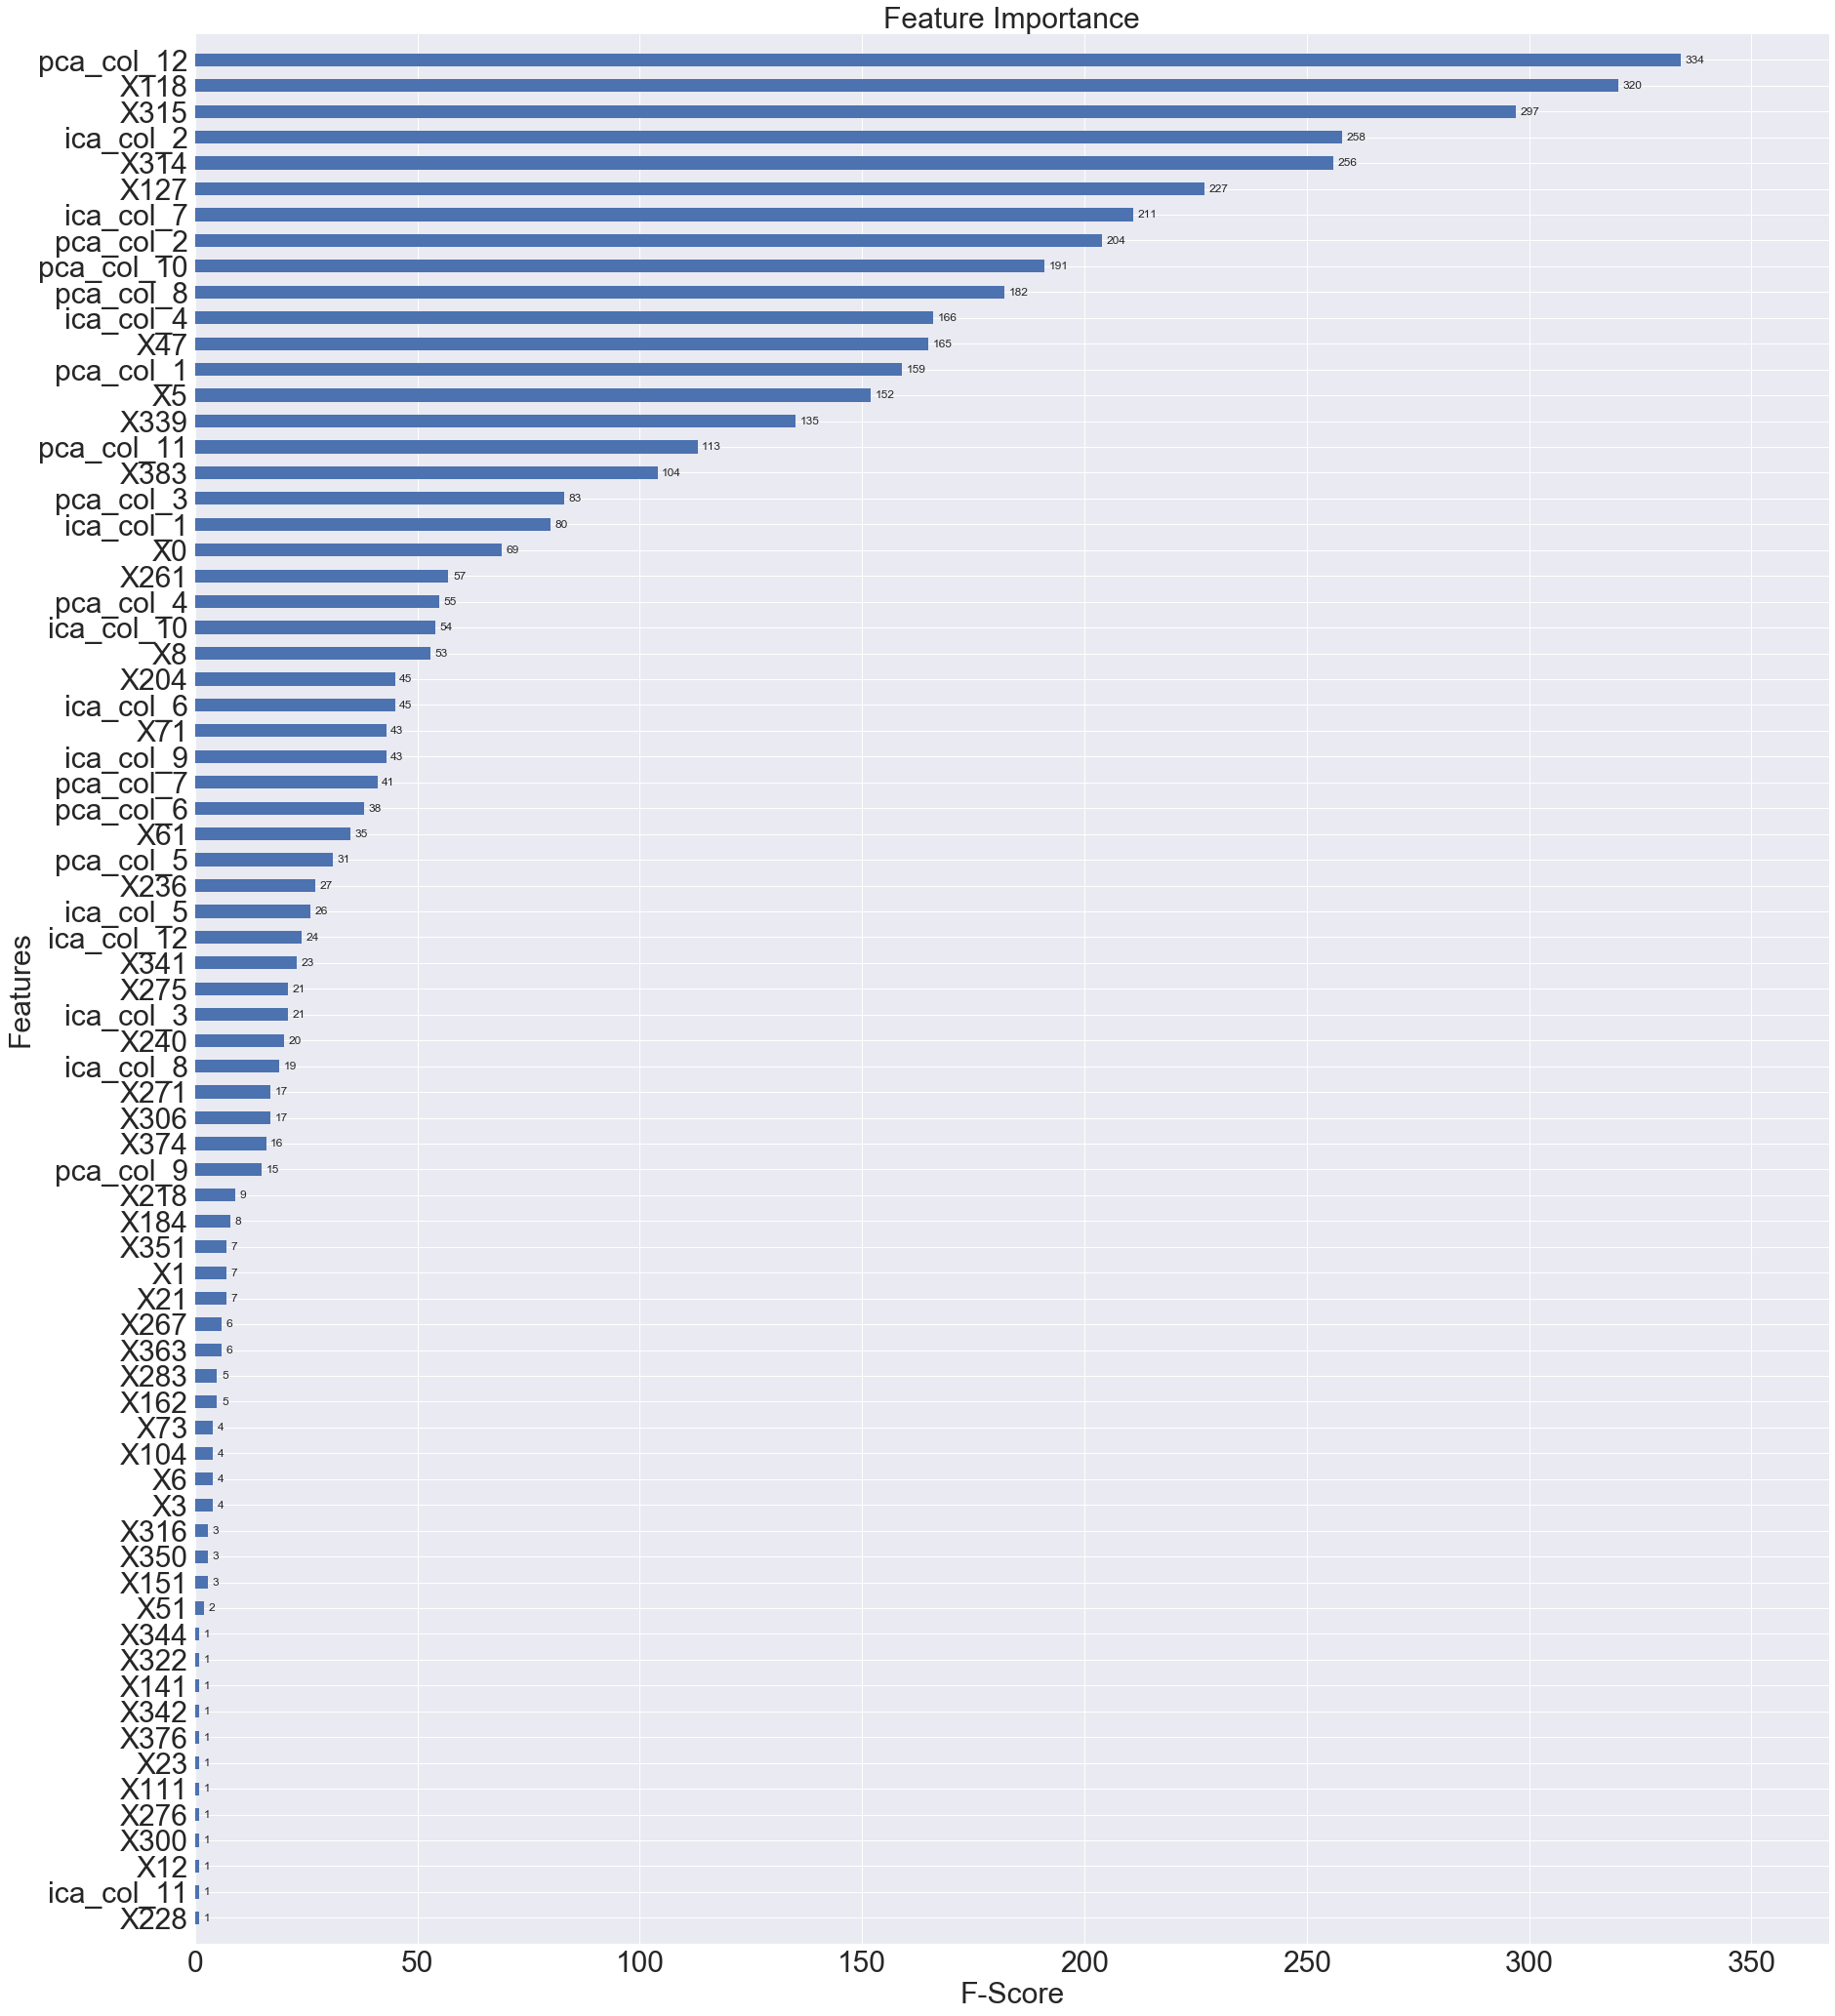

In [153]:
fig, ax = plt.subplots(figsize=(30,36))
xgb.plot_importance(model,height=0.5, ax=ax)
plt.tick_params(labelsize=30)
plt.title("Feature Importance",fontsize=30)
plt.xlabel("F-Score",fontsize=30)
plt.ylabel("Features",fontsize=30)
plt.show()


In [154]:
fscore_threshold = 60
feature_importance = model.get_fscore()
to_drop = [k for k, v in feature_importance.iteritems() if v < fscore_threshold]
print("%d Features to drop\n"%len(to_drop))
print("Below features will be dropped:\n")
pprint(to_drop)

53 Features to drop

Below features will be dropped:

['X341',
 'X228',
 'X61',
 'X184',
 'ica_col_10',
 'ica_col_11',
 'ica_col_12',
 'X151',
 'ica_col_8',
 'ica_col_9',
 'X3',
 'ica_col_3',
 'ica_col_6',
 'ica_col_5',
 'X218',
 'X363',
 'X236',
 'X21',
 'X8',
 'X12',
 'X306',
 'X204',
 'X350',
 'X300',
 'X276',
 'X111',
 'X6',
 'X271',
 'X23',
 'X267',
 'X51',
 'X104',
 'X73',
 'X71',
 'pca_col_7',
 'pca_col_6',
 'pca_col_5',
 'pca_col_4',
 'pca_col_9',
 'X275',
 'X376',
 'X162',
 'X374',
 'X1',
 'X342',
 'X141',
 'X322',
 'X316',
 'X283',
 'X351',
 'X240',
 'X344',
 'X261']


In [155]:
for column in dFtrain:
    if (column in to_drop):
        dFtrain.drop(column,axis=1,inplace=True)
        dFtest.drop(column,axis=1,inplace=True)

print(dFtrain.shape)
print(dFtest.shape)

(4209, 347)
(4209, 347)


# Modeling

In [156]:
##### Splitting the provided training data into a training set and a testing set #####
from sklearn import model_selection	
X_train, X_test, y_train, y_test = model_selection.train_test_split(dFtrain,TimeTargets,test_size=0.15,random_state=7)

In [157]:
from sklearn.metrics import r2_score

##### Ridge Regressor #####
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1, normalize=False, solver='cholesky')
ridge.fit(X_train, y_train)
Predictions = ridge.predict(X_test)
score = r2_score(y_test, Predictions)
print ("R2 Score for Ridge Regressor: %.4f"%score)
#KaggleSubmission = ridge.predict(dFtest)

##### Extra Forest Regressor #####
from sklearn.ensemble import ExtraTreesRegressor
efr = ExtraTreesRegressor(n_estimators=10, criterion='mae', max_depth=15)
efr.fit(X_train, y_train)
Predictions = efr.predict(X_test)
score = r2_score(y_test, Predictions)
print ("R2 Score for Extra Forest Regressor: %.4f"%score)
#KaggleSubmission = efr.predict(dFtest)

##### Gradient Boosting Regressor #####
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=133, alpha=0.8, max_depth=3, min_samples_split=0.3, max_features=35)
GBR.fit(X_train, y_train)
Predictions = GBR.predict(X_test)
score = r2_score(y_test, Predictions)
print ("R2 Score for Gradient Boosting Regressor: %.4f"%score)
#KaggleSubmission = GBR.predict(dFtest)

##### Support Vector Regressor #####
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
Predictions = svr.predict(X_test)
score = r2_score(y_test, Predictions)
print ("R2 Score for SVR: %.4f"%score)
#KaggleSubmission = svr.predict(dFtest)


R2 Score for Ridge Regressor: 0.5458
R2 Score for Extra Forest Regressor: 0.5434
R2 Score for Gradient Boosting Regressor: 0.5676
R2 Score for SVR: 0.3703


In [158]:
# ### MLP Trial ###
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
MLP = MLPRegressor()
# parameters = {'hidden_layer_sizes':[200,500],'activation':('logistic', 'relu'), 'alpha':[0.0001, 0.0002], 'learning_rate_init':[0.001,0.0009, 0.002]}
# print ('Starting to tune parameters for MLP...')
# clf = GridSearchCV(MLP, parameters)
MLP = MLPRegressor(alpha=0.0002, activation='logistic', hidden_layer_sizes=500, learning_rate_init =0.0009)
# clf.fit(X_train, y_train)
MLP.fit(X_train, y_train)
# print ('Done tuning. Starting to predict...')
# Predictions = clf.predict(X_test)
Predictions = MLP.predict(X_test)
score = r2_score(y_test, Predictions)
print ("R2 Score for MLP: %.4f"%score)
# KaggleSubmission = clf.predict(dFtest)
#KaggleSubmission = MLP.predict(dFtest)
# print (clf.best_params_)


R2 Score for MLP: 0.5663


In [159]:
## xgboost trial 2, gridsearch ###
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

y_mean = np.mean(y_train)
xgbr = XGBRegressor()

xgb_params = {'max_depth': [1,2,10],
              'learning_rate': [0.001, 0.005, 0.01],
              'n_estimators':[1500,2000,2500],
              'base_score':[0.,np.mean(y_train)],
              'objective':['reg:linear']}

#Can't do logistic regression because labels need to be in [0,1]
'''
xgb_params = {'max_depth': [2,3,6],
              'learning_rate': [0.005],
              'n_estimators':[750, 1000, 1500],
              'base_score':[0.01,0.5,0.99],
              'objective':('reg:logistic','reg:linear')}

'''
clf = GridSearchCV(xgbr, xgb_params)
clf.fit(X_train, y_train)
Predictions = clf.predict(X_test)
KaggleSubmission = clf.predict(dFtest)
print (clf.best_params_)

{'n_estimators': 1500, 'objective': 'reg:linear', 'learning_rate': 0.005, 'max_depth': 2, 'base_score': 0.0}


In [160]:
## xgboost trial 2, gridsearch ###
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgbr = XGBRegressor(max_depth=2,n_estimators=1500,objective='reg:linear',learning_rate=0.005,base_score=0.0)

xgbr.fit(X_train, y_train)
Predictions = xgbr.predict(X_test)
KaggleSubmission = xgbr.predict(dFtest)

In [161]:
### Determining the R^2 score###
score = r2_score(y_test, Predictions)
print (score)

### Predicting for Kaggle ###
SubmissionDF = pd.DataFrame({'ID':Test_IDs, 'y':KaggleSubmission})
SubmissionDF.to_csv(r'sample_submission.csv', mode='w', index=False)

0.582301972408
